<a href="https://colab.research.google.com/github/Derrick-Majani/Feauture-Eng-Binning/blob/main/MyData_Moses_Copy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas_profiling
import io
import os
import sys

%matplotlib inline
import seaborn as sns
from sklearn.model_selection import (
    train_test_split,
)  # Sklearn package's randomized data splitting function
import pandas_profiling

sns.set(color_codes=True)
import warnings

from sklearn.model_selection import (
    train_test_split,
)  # Sklearn package's randomized data splitting function

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm


import scipy.stats as stats

### Data Overview

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
My_Data = pd.read_csv('/content/gdrive/MyDrive/MyData.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (25,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
My_Data.head()

,Unnamed: 0,RESPNO,URBRUR,REGION,EA_SVC_A,EA_SVC_B,EA_SVC_C,EA_SVC_D,EA_SVC_E,EA_FAC_A,...,Q117,Q118,Q119_1,Q119_2,Q119_3,Q119_4,Q119_5,Q119OTHER,withinwt,withinwt_New
0,1,KEN0001,1,300,1,1,1,1,9,1,...,301,7,1,4,301,9996,9996,NaN,0.845083,0.965809
1,2,KEN0002,1,300,1,1,1,1,9,1,...,301,8,1,4,301,9996,9996,NaN,0.845083,0.482904
2,3,KEN0003,1,300,1,1,1,1,9,1,...,301,9,1,4,301,9996,9996,NaN,0.845083,0.965809
3,4,KEN0004,1,305,1,1,1,1,1,1,...,300,7,1,4,300,9996,9996,NaN,1.150776,0.708170
4,5,KEN0005,1,305,1,1,1,1,1,1,...,300,7,1,4,300,9996,9996,NaN,1.150776,1.416340


In [ ]:
enews = My_Data.copy()

In [ ]:
enews.shape

(2400, 368)

### check number of rows and columns
data.shape

In [ ]:
enews.shape

(2400, 368)

### Extract Specific Data From the Main Data

In [ ]:
specific_data = enews[
    ["Q17D", "Q44H", "Q43A", "Q53B", "Q46A", "Q46B", "URBRUR","REGION","Q43B","Q101","Q44K"]
]
print(specific_data.head(10))

   Q17D  Q44H  Q43A  Q53B  Q46A  Q46B  URBRUR  REGION  Q43B  Q101  Q44K
0     3     7     1     2     3     3       1     300     0     2     7
1     2     2     1     9     3     3       1     300     1     1     7
2     0     3     1     1     3     3       1     300     1     2     7
3     0     7     1     0     2     4       1     305     1     2     7
4     3     4     1     0     4     4       1     305     1     1     7
5     3     2     1     0     4     4       1     305     0     1     7
6     3     7     4     1     1     3       1     300     1     1     7
7     3     2     4     2     4     4       1     300     0     2     7
8     0     7     4     1     2     3       1     300     1     2     7
9     0     7     3     1     9     9       1     300     1     2     7


### Number of Rows and Columns of the Specific Data

In [ ]:
print(
    f"There are {specific_data.shape[0]} rows and {specific_data.shape[1]} columns."
)  # f-string

# I'm now going to look at 10 random rows
# I'm setting the random seed via np.random.seed so that
# I get the same random results every time
specific_data.sample(n=10)
specific_data.shape

There are 2400 rows and 11 columns.


(2400, 11)

### Rename Colums of Specific Data

In [ ]:
df1 = specific_data.rename(
    columns={
        "Q17D": "Violence",
        "Q44H": "HardID",
        "Q43A": "Corruption",
        "Q53B": "election",
        "Q46A": "Infofees",
        "Q46B": "Infotaxes",
        "Q43B": "fear",
        "Q101": "gender",
        "Q44K": "HardPol",
        
    }
)
df1

,Violence,HardID,Corruption,election,Infofees,Infotaxes,URBRUR,REGION,fear,gender,HardPol
0,3,7,1,2,3,3,1,300,0,2,7
1,2,2,1,9,3,3,1,300,1,1,7
2,0,3,1,1,3,3,1,300,1,2,7
3,0,7,1,0,2,4,1,305,1,2,7
4,3,4,1,0,4,4,1,305,1,1,7
...,...,...,...,...,...,...,...,...,...,...,...
2395,3,3,1,0,2,3,1,321,1,2,7
2396,3,4,4,1,3,3,1,321,1,2,7
2397,2,2,3,2,2,2,1,321,0,2,7
2398,3,3,4,2,3,3,2,319,1,1,7


In [ ]:
# let's create a copy of the data to avoid any changes to original data
df2 = df1.copy()
df2.head()

,Violence,HardID,Corruption,election,Infofees,Infotaxes,URBRUR,REGION,fear,gender,HardPol
0,3,7,1,2,3,3,1,300,0,2,7
1,2,2,1,9,3,3,1,300,1,1,7
2,0,3,1,1,3,3,1,300,1,2,7
3,0,7,1,0,2,4,1,305,1,2,7
4,3,4,1,0,4,4,1,305,1,1,7


In [ ]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Violence,2400.0,1.922917,1.288475,0.0,1.0,2.0,3.0,9.0
HardID,2400.0,4.897500,2.116529,1.0,3.0,4.0,7.0,9.0
Corruption,2400.0,2.273750,1.499916,1.0,1.0,2.0,4.0,9.0
election,2400.0,1.802083,1.783976,0.0,1.0,2.0,2.0,9.0
Infofees,2400.0,3.248333,1.319048,1.0,3.0,3.0,4.0,9.0
Infotaxes,2400.0,3.524583,1.066084,1.0,3.0,4.0,4.0,9.0
URBRUR,2400.0,1.643333,0.479115,1.0,1.0,2.0,2.0,2.0
REGION,2400.0,322.296667,15.021851,300.0,307.0,324.0,336.0,346.0
fear,2400.0,0.896250,0.914696,0.0,1.0,1.0,1.0,9.0
gender,2400.0,1.499583,0.500104,1.0,1.0,1.0,2.0,2.0


** Observation
- Mean HardID is greater than the median, this suggests that HardID is right skewed.
-There is a large difference between 3rd Quartile for Violence,election and the maximum values. This could indicate possibilities of outliers. 

## Group/Bin Regions to Provinces

In [ ]:
binned_ht = pd.cut(
df1["REGION"], [-np.inf, 300, 305, 311, 319, 322, 328, 342, 346, np.inf]
 )
binned_ht

0        (-inf, 300.0]
1        (-inf, 300.0]
2        (-inf, 300.0]
3       (300.0, 305.0]
4       (300.0, 305.0]
             ...      
2395    (319.0, 322.0]
2396    (319.0, 322.0]
2397    (319.0, 322.0]
2398    (311.0, 319.0]
2399    (311.0, 319.0]
Name: REGION, Length: 2400, dtype: category
Categories (9, interval[float64, right]): [(-inf, 300.0] < (300.0, 305.0] < (305.0, 311.0] <
                                           (311.0, 319.0] ... (322.0, 328.0] < (328.0, 342.0] <
                                           (342.0, 346.0] < (346.0, inf]]

In [ ]:
binned_ht.value_counts(dropna=False)

(328.0, 342.0]    680
(322.0, 328.0]    336
(311.0, 319.0]    312
(-inf, 300.0]     256
(300.0, 305.0]    256
(342.0, 346.0]    248
(305.0, 311.0]    224
(319.0, 322.0]     88
(346.0, inf]        0
Name: REGION, dtype: int64

In [ ]:
# can add custom labels
df1['REGION_bin'] = pd.cut(
 df1['REGION'], [-np.inf, 300, 305, 311, 319, 322, 328, 342, 346, np.inf], 
  labels = ["Nairobi", "Central", "Coast", "Eastern","North_Eastern","Nyanza","Rift_Valley","Western","Other"]
)
df1.drop(['REGION'], axis=1, inplace=True)
df1['REGION_bin'].value_counts(dropna=False)

Rift_Valley      680
Nyanza           336
Eastern          312
Nairobi          256
Central          256
Western          248
Coast            224
North_Eastern     88
Other              0
Name: REGION_bin, dtype: int64

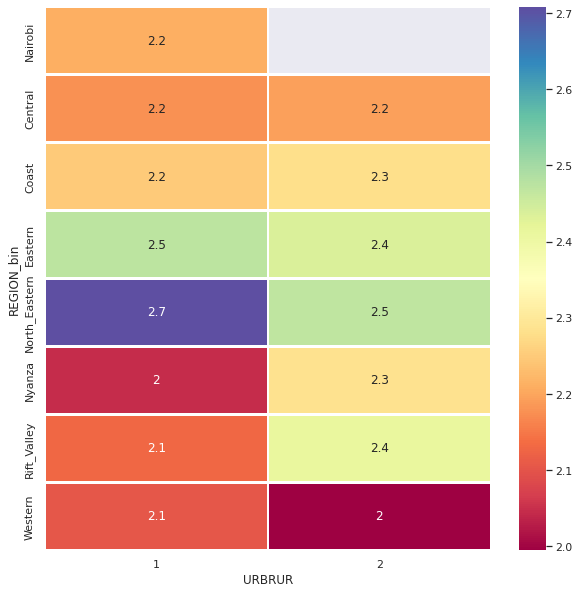

In [ ]:
df_hm = df1.pivot_table(
    index="REGION_bin",
    columns="URBRUR",
    values="Corruption",
    aggfunc=np.mean,
)

# Draw a heatmap
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df_hm, cmap="Spectral", linewidths=1.5, annot=True, ax=ax)
plt.show()

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

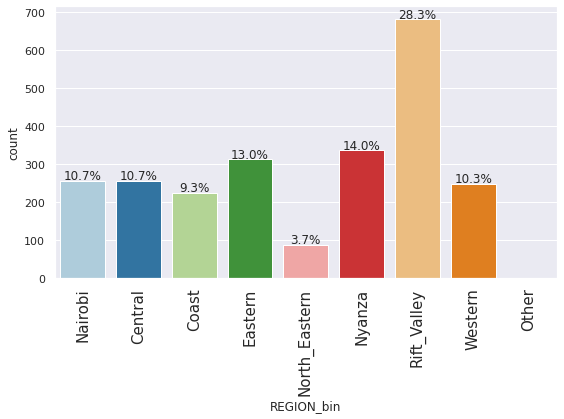

In [ ]:
labeled_barplot(df1, "REGION_bin", perc=True)

- Rift valley has the highest count of Corruption cases.
- North_Eastern has the least (3.7%) count of Corruption
- Nairobi and Central have similar count(10.7%) of Corruption cases.

In [ ]:
# Write your code here
df1['Infofees'].value_counts()

3    1109
4     695
2     446
9      80
1      69
8       1
Name: Infofees, dtype: int64

In [ ]:
# checking for duplicate values
df2.duplicated().sum()

31

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Violence    2400 non-null   int64
 1   HardID      2400 non-null   int64
 2   Corruption  2400 non-null   int64
 3   election    2400 non-null   int64
 4   Infofees    2400 non-null   int64
 5   Infotaxes   2400 non-null   int64
 6   URBRUR      2400 non-null   int64
 7   REGION      2400 non-null   int64
 8   fear        2400 non-null   int64
 9   gender      2400 non-null   int64
 10  HardPol     2400 non-null   int64
dtypes: int64(11)
memory usage: 206.4 KB


In [ ]:
# Replace Columns With Categorical Variables
df2["election"] = df2["election"].replace(
    {0: "Not at all",1: "Not very Well", 2: "Well,", 3: "Very well,", 8:"Refused", 9: "Don't Know"}
)

df2["Infotaxes"] = df2["Infotaxes"].replace(
    {
        1: "Very easy",
        2: "Easy",
        3: "difficult",
        4: "Very difficult",
        8: "Refused",
        9: "Don’t know",
    }
)
df2["Violence"] = df2["Violence"].replace({
        0: "A lot",
        1: "Somewhat",
        2: "A little Bit",
        3: "Not at all",
        8: "Refused",
        9: "Don’t know"})

df2["Corruption"] = df2["Corruption"].replace({0:'None',
1:'Increased a lot',
2:'Increased Somewhat',
3:'Stayed the same',
4: 'Decreased_Somewhat',
5: 'Decreased a lot',
8:'Refused',
9:'Don’t know/Haven’t heard'})


df2["Infofees"] = df2["Infofees"].replace(
    {
        1: "Very easy",
        2: "Easy",
        3: "difficult",
        4: "Very difficult",
        8: "Refused",
        9: "Don’t know",
    }
)


df2["HardPol"] = df2["HardPol"].replace(
    {
        1: "Very easy",
        2: "Easy",
        3: "difficult",
        4: "Very difficult",
        7: "No contact",
        8: "Refused",
        9: "Don’t know",
    }
)
# Replace Columns With Categorical Variables
df2["URBRUR"] = df2["URBRUR"].replace(
    {1: "Urban",2: "Rural",}
)
df2["HardID"] = df2["HardID"].replace({0:'None',
1:'Very_Easy',
2:'Easy',
3:'Difficult',
4: 'Very_Difficult',
7: 'No contact',
8:'Refused',
9:'Don’t know/Haven’t heard'})

df2["fear"] = df2["fear"].replace(
    {0: "No fear",1: "fear",})
df2["gender"] = df2["gender"].replace(
    {1: "Male",2: "female",})




### Change Data Types 

In [ ]:
df2["Corruption"].value_counts()

Increased a lot             1052
Decreased_Somewhat           520
Increased Somewhat           474
Stayed the same              266
Decreased a lot               53
Don’t know/Haven’t heard      34
Refused                        1
Name: Corruption, dtype: int64

In [ ]:
# Check for missing values
df2.isnull().sum()

Violence      0
HardID        0
Corruption    0
election      0
Infofees      0
Infotaxes     0
URBRUR        0
REGION        0
fear          0
gender        0
HardPol       0
dtype: int64

In [ ]:
df2.dtypes.sort_index(ascending=True)

Corruption    object
HardID        object
HardPol       object
Infofees      object
Infotaxes     object
REGION         int64
URBRUR        object
Violence      object
election      object
fear          object
gender        object
dtype: object

### EDA(Exploratory Data Analysis)

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Univariate analysis

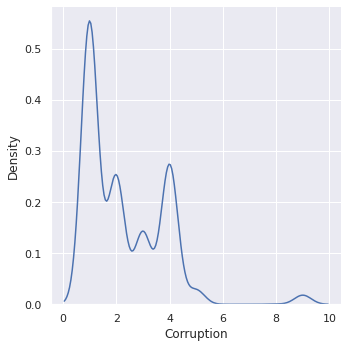

In [ ]:
sns.displot(df1["Corruption"], kind="kde")

Observation
* Corruption is densly populated between 0-2 levels then it gradually decreases.

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(22, 17), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df1, x=feature, ax=ax_box2, showmeans=True, color="yellow"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df2, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df2, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df1, x=feature, ax=ax_box2, showmeans=True, color="yellow"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df1, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df1, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Observations on Corruption

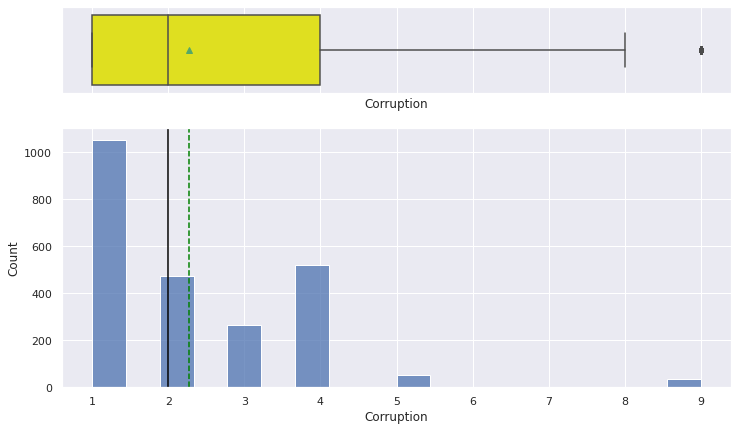

In [ ]:
histogram_boxplot(df1, "Corruption")

**Observations**

- *Corruption* is right skewed, which means some areas have high Corruption.
- Mean Corruption is around 2.273750.
- Corruption could be affected by outliers.

Let's apply the log transform to see if we can make the distribution closer to normal.

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Violence    2400 non-null   int64   
 1   HardID      2400 non-null   int64   
 2   Corruption  2400 non-null   int64   
 3   election    2400 non-null   int64   
 4   Infofees    2400 non-null   int64   
 5   Infotaxes   2400 non-null   int64   
 6   URBRUR      2400 non-null   int64   
 7   fear        2400 non-null   int64   
 8   gender      2400 non-null   int64   
 9   HardPol     2400 non-null   int64   
 10  REGION_bin  2400 non-null   category
dtypes: category(1), int64(10)
memory usage: 190.3 KB


### Observation on Violence

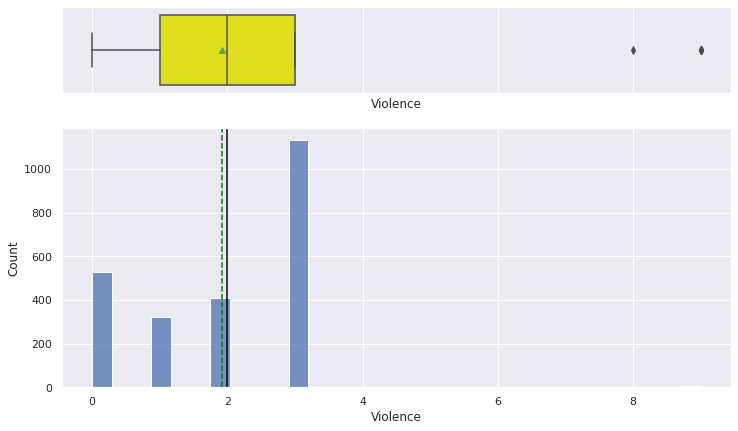

In [ ]:
histogram_boxplot(df1, "Violence")

- Violence is skewed to the right with few outliers to the right of the variable

### Observation on Election

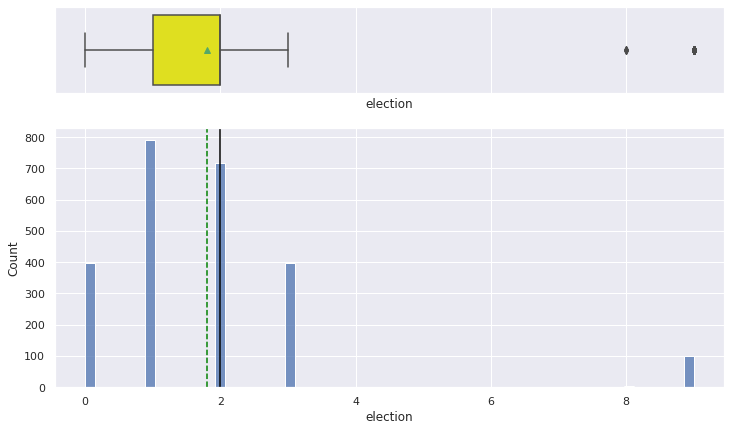

In [ ]:
histogram_boxplot(df1,"election")

- Election is skewed to the right with a few outliers to the right of the variable.

### Observations on Infofees    

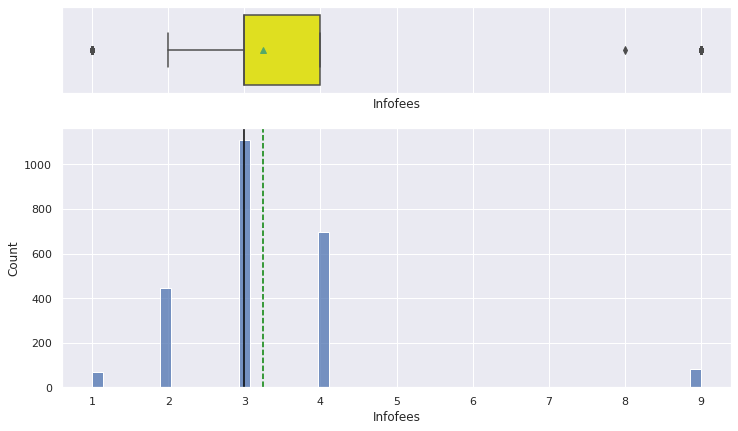

In [ ]:
histogram_boxplot(df1,"Infofees")

- Infofees is distributed with a mean of 3.24 and has few outliers to the right

### Observations on Infotaxes

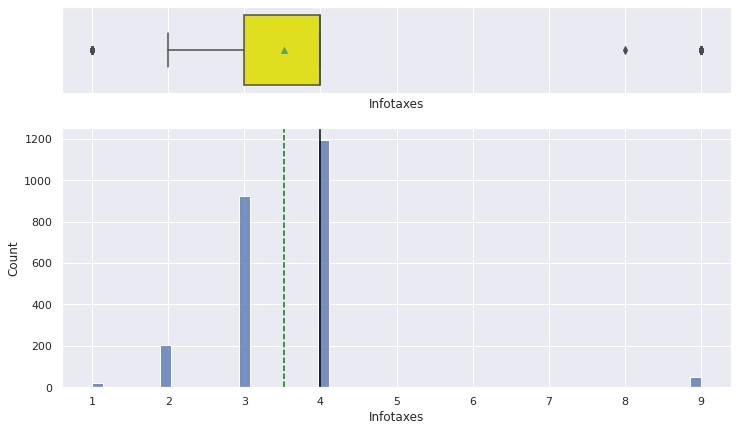

In [ ]:
histogram_boxplot(df1,"Infotaxes")

- Infotaxes has a mean of 3.5 with a few outliers to the right of the variable

### Observation on HardID

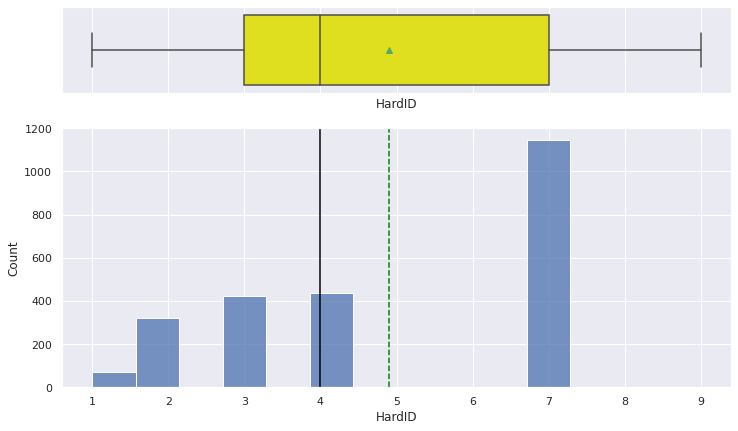

In [ ]:
histogram_boxplot(df1,"HardID")     

- HardID seems has a mean of 4.89 and seems to be normally distributed with no outliers

### Observation on URBRUR

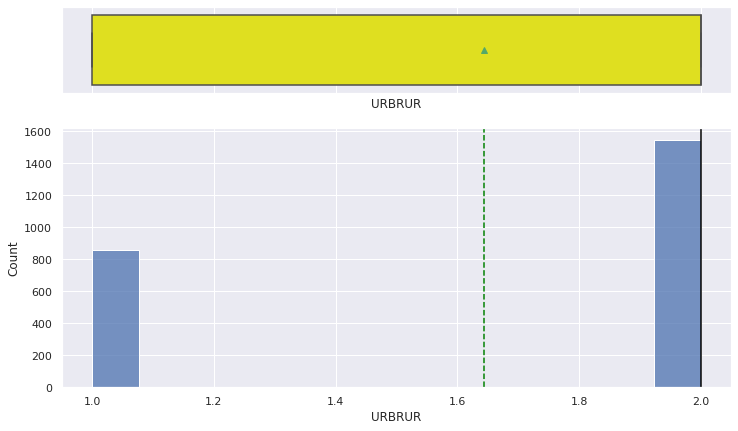

In [ ]:
histogram_boxplot(df1,"URBRUR")        

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df2,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot


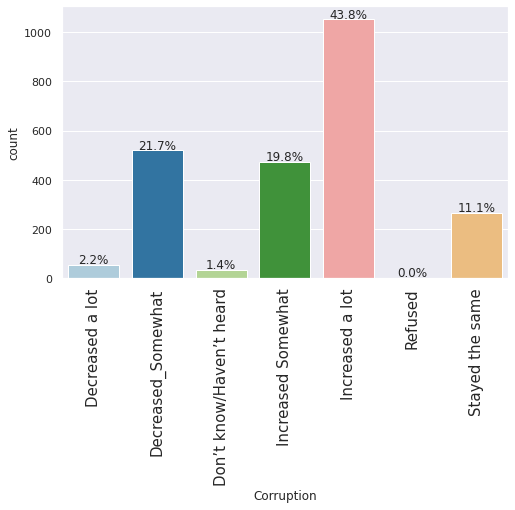

In [ ]:
labeled_barplot(df2, "Corruption", perc=True)

- 43.8% of the people believe that Corruption has increased a lot 
-2.2% of the respondents believe that corruption level has decreased a lot.
- 1.4% of the respondends belive have not heard about the level of Corruption

### Observation by Region

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df1,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot


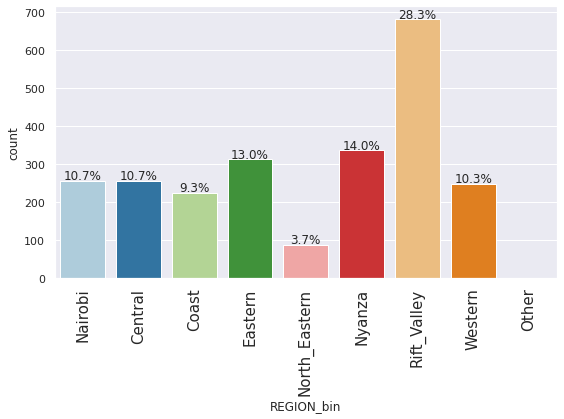

In [ ]:
labeled_barplot(df1, "REGION_bin", perc=True)

- Rift valley has the highest respondents (28.3%).
- Nairobi and Central have equal respondents(10.7%)
- North Eastern has the lowest respondents (3.7%)

### Observations on Region

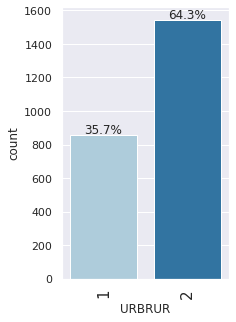

In [ ]:
labeled_barplot(df1, "URBRUR", perc=True)

- Majority of the respondents are from the Rural areas(64.3%)

## Bivariate Analysis

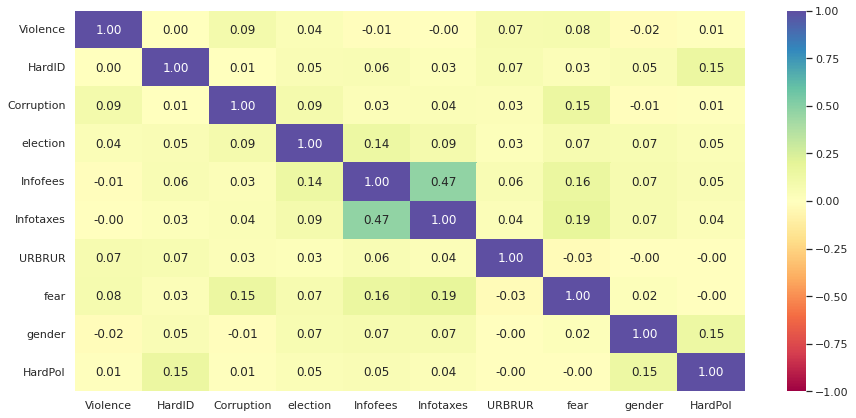

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(df1.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- Corruption is positively correlated to election and violence.
- Violence is negatively correlated to Infofees
- Infofees is positively corellated to election.

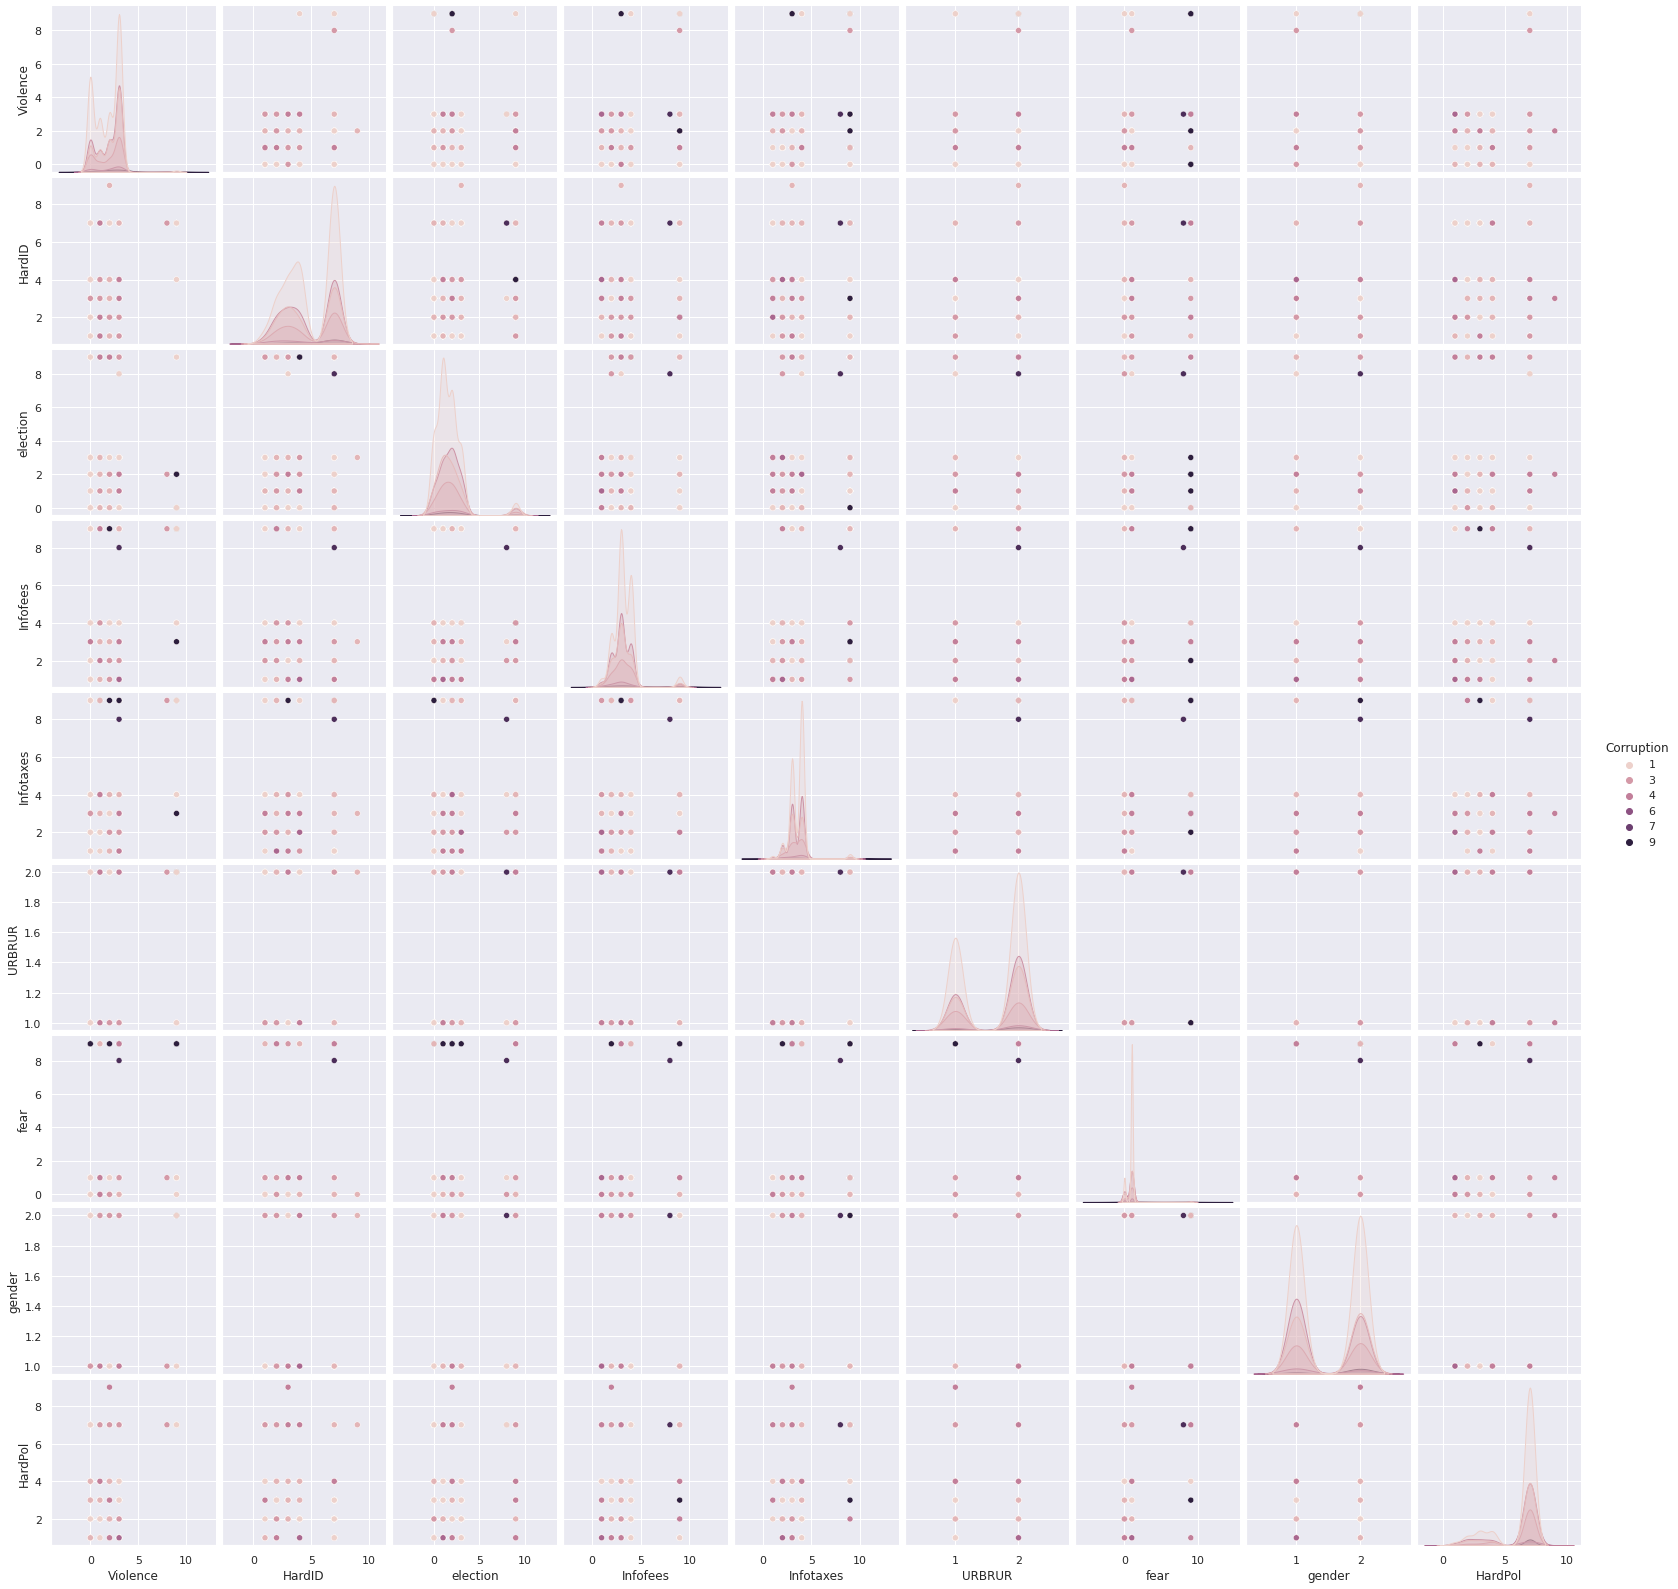

In [ ]:
sns.pairplot(df1,hue='Corruption')
plt.show()

- URBRUR as compared to other variables shows that irrespective of the Class range of reported Corruption cases is almost the same.
- Variables have slight positive correlation

### Corruption Verses URBRUR

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


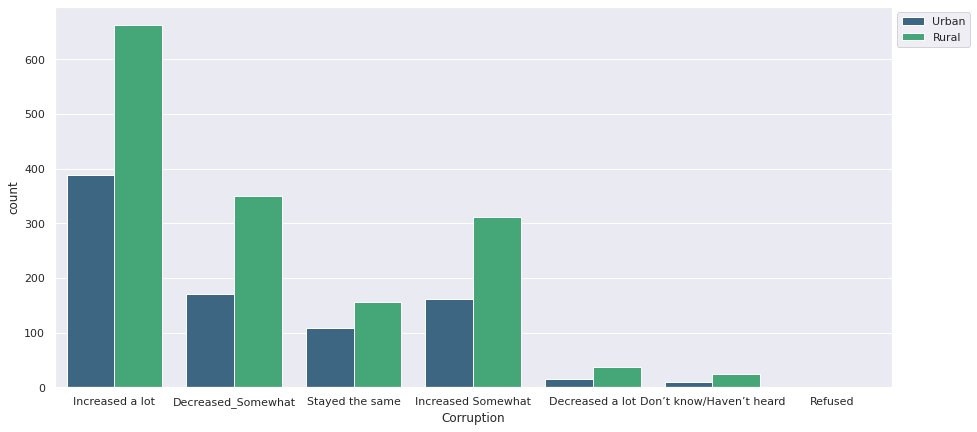

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(df2["Corruption"],hue=df2["URBRUR"],palette='viridis')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

- Level of Corruption have increased a lot in Rural areas as compared to Urban Areas.
- Lowest respondents from Urban areas believe they have not heard anything about the level of Corruption

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Violence    2400 non-null   int64   
 1   HardID      2400 non-null   int64   
 2   Corruption  2400 non-null   int64   
 3   election    2400 non-null   int64   
 4   Infofees    2400 non-null   int64   
 5   Infotaxes   2400 non-null   int64   
 6   URBRUR      2400 non-null   int64   
 7   fear        2400 non-null   int64   
 8   gender      2400 non-null   int64   
 9   HardPol     2400 non-null   int64   
 10  REGION_bin  2400 non-null   category
dtypes: category(1), int64(10)
memory usage: 190.3 KB


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Violence    2400 non-null   object
 1   HardID      2400 non-null   object
 2   Corruption  2400 non-null   object
 3   election    2400 non-null   object
 4   Infofees    2400 non-null   object
 5   Infotaxes   2400 non-null   object
 6   URBRUR      2400 non-null   object
 7   REGION      2400 non-null   int64 
 8   fear        2400 non-null   object
 9   gender      2400 non-null   object
 10  HardPol     2400 non-null   object
dtypes: int64(1), object(10)
memory usage: 206.4+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


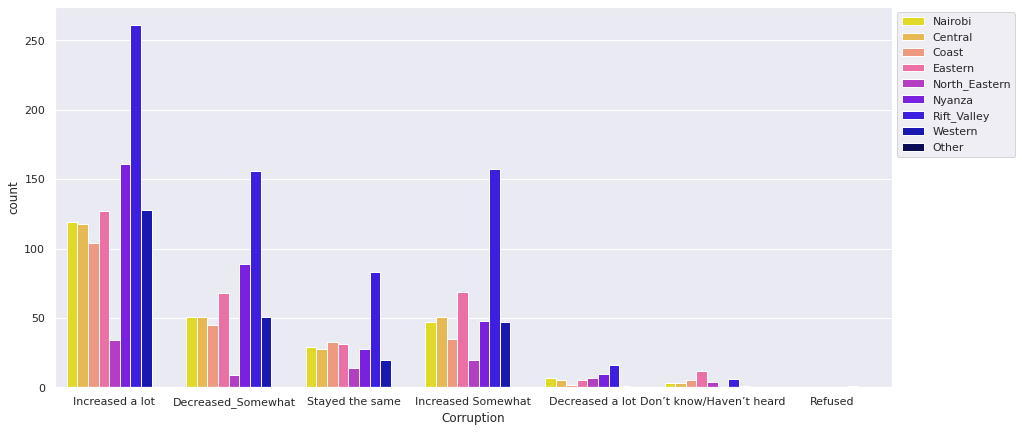

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(df2["Corruption"],hue=df1["REGION_bin"],palette='gnuplot2_r')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


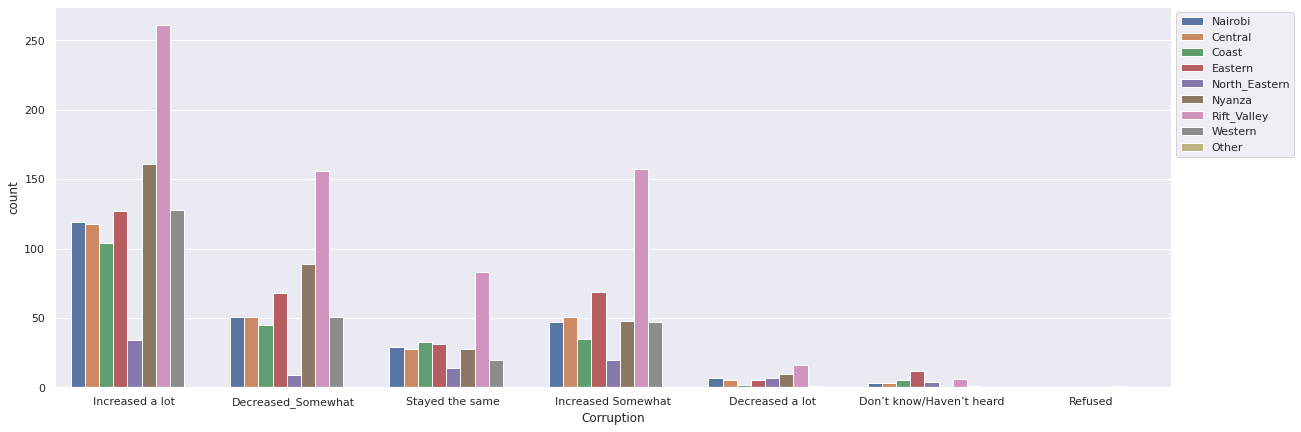

In [ ]:
plt.figure(figsize=(20,7))
sns.countplot(df2['Corruption'], hue =df1['REGION_bin'])
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

### Corruption Verses HardID Verses Region

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


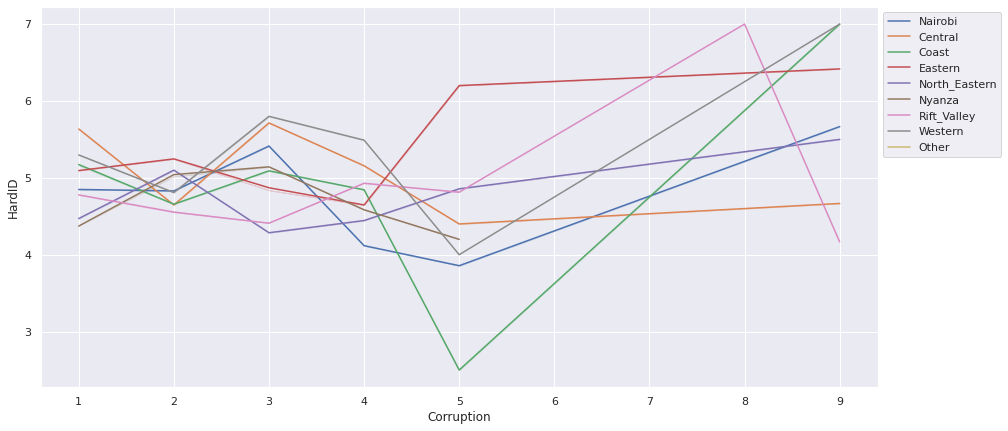

In [ ]:
plt.figure(figsize=(15,7))
sns.lineplot(df1["Corruption"],df1["HardID"],hue=df1["REGION_bin"],ci=0)
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

- Coast Region and Western region had no contact person to give documentation on respondents who do not know or have not heard abouth Corruption.
- Rift Valley Region had no contact person to give documentation  on respondents who refused to give information on Corruption.
- It was easy to obtain documentation in Coast Region where respondents felt the level of Corruption has decreased a lot.

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

## Violence Verses URBRUR

URBRUR        Rural  Urban   All
Violence                        
All            1544    856  2400
Not at all      765    367  1132
A lot           306    223   529
A little Bit    259    150   409
Somewhat        208    113   321
Don’t know        5      3     8
Refused           1      0     1
------------------------------------------------------------------------------------------------------------------------


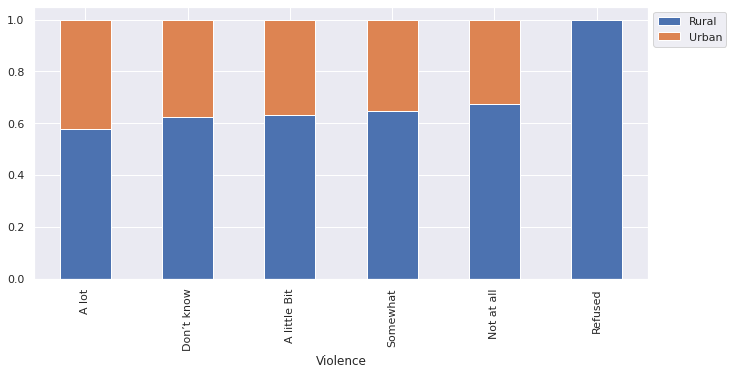

In [ ]:
stacked_barplot(df2, "Violence", "URBRUR")

- A lot of people who feared becoming victims of political violence or intimidation came from Urban areas.
- There was no person from Urban area who Refused to be a victim of political violence.

### Corruption Verses Infofees

Infofees                  Don’t know  Easy  Refused  Very difficult  \
Corruption                                                            
Refused                            0     0        1               0   
All                               80   446        1             695   
Decreased a lot                    1    12        0              10   
Decreased_Somewhat                11   111        0             141   
Don’t know/Haven’t heard          10     6        0               8   
Increased Somewhat                15    98        0             114   
Increased a lot                   32   164        0             344   
Stayed the same                   11    55        0              78   

Infofees                  Very easy  difficult   All  
Corruption                                            
Refused                           0          0     1  
All                              69       1109  2400  
Decreased a lot                   5         25    53  
Decreased_Some

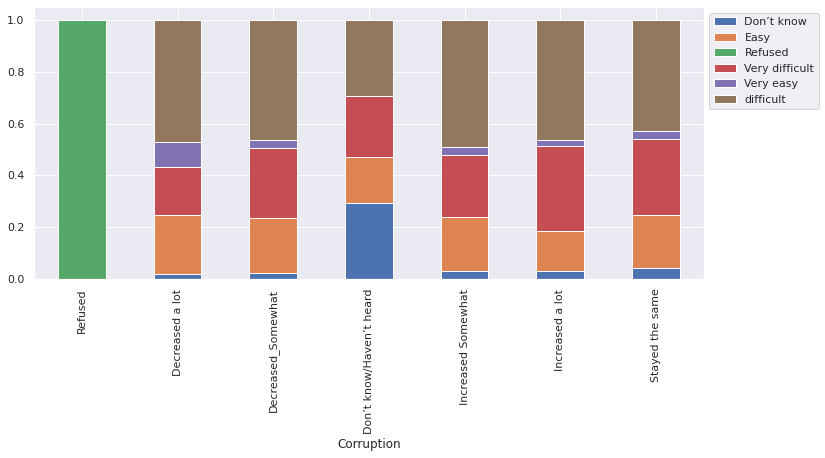

In [ ]:
stacked_barplot(df2, "Corruption", "Infofees")

- Respondents who refused to give information on level of Corruption also refused to give information on taxes and fees they are to pay the government.
- Respondends who felt the level of Corruption has decreased found it easy to obtain infomation on taxes and fees to pay the government.
- Most People who do not know on the fees to pay to the government also do not know or have not heard on the level of Corruption.

### Corruption Verse Infotaxes

Infotaxes                 Don’t know  Easy  Refused  Very difficult  \
Corruption                                                            
Refused                            0     0        1               0   
All                               52   205        1            1193   
Decreased a lot                    1    10        0              28   
Decreased_Somewhat                 4    53        0             244   
Don’t know/Haven’t heard          11     5        0               7   
Increased Somewhat                 9    50        0             199   
Increased a lot                   17    59        0             591   
Stayed the same                   10    28        0             124   

Infotaxes                 Very easy  difficult   All  
Corruption                                            
Refused                           0          0     1  
All                              23        926  2400  
Decreased a lot                   1         13    53  
Decreased_Some

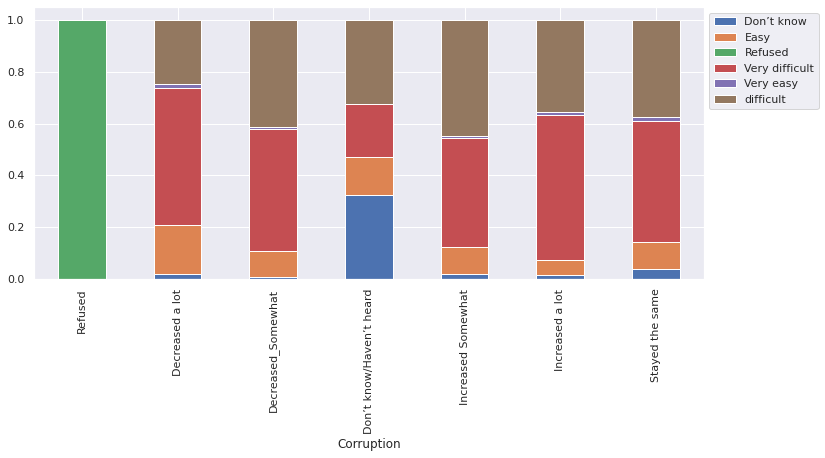

In [ ]:
stacked_barplot(df2, "Corruption", "Infotaxes")

- People who find it difficult to see how government uses tax revenues believe that somewhat Corruption has decreased.
- People who find it easy to see how government ises tax revenues believe that the level of Corruption has increased a lot.

### Corruption Verses election

election                  Don't Know  Not at all  Not very Well  Refused  \
Corruption                                                                 
All                               99         396            790        3   
Increased a lot                   31         194            374        1   
Refused                            0           0              0        1   
Stayed the same                   13          39             86        1   
Decreased a lot                    2          11             12        0   
Decreased_Somewhat                22          74            141        0   
Don’t know/Haven’t heard           4           3              8        0   
Increased Somewhat                27          75            169        0   

election                  Very well,  Well,   All  
Corruption                                         
All                              396    716  2400  
Increased a lot                  163    289  1052  
Refused                        

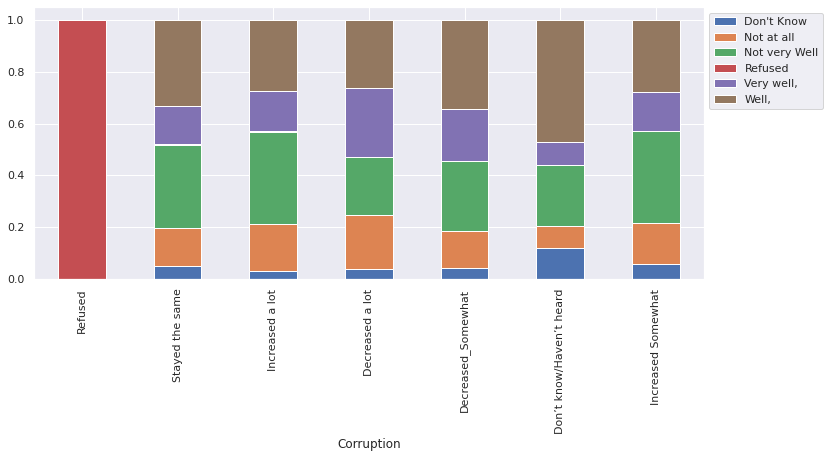

In [ ]:
stacked_barplot(df2, "Corruption", "election")

- People who refused to give information on the level of Corruption also refused to give information on how elections enable voters to remove leaders from office.
- People who have not heard of the level of Corruption agree well that elections enable voters to remove leaders from office.
- Respondents the see Very well that elections enable voters to remove leaders from office see that Corruption level has decreased a lot

In [ ]:
df1.head()

,Violence,HardID,Corruption,election,Infofees,Infotaxes,URBRUR,fear,gender,HardPol,REGION_bin
0,3,7,1,2,3,3,1,0,2,7,Nairobi
1,2,2,1,9,3,3,1,1,1,7,Nairobi
2,0,3,1,1,3,3,1,1,2,7,Nairobi
3,0,7,1,0,2,4,1,1,2,7,Central
4,3,4,1,0,4,4,1,1,1,7,Central


## Linear Model Building

1. We want to predict the Corruption levels

2. Before we proceed to build a model, we'll have to encode categorical features.

3. We'll split the data into train and test to be able to evaluate the model that we build on the train data.

4. We will build a Linear Regression model using the train data and then check it's performance.

In [ ]:
df1.loc[:, (df1 != df1.iloc[0]).any()]

,Violence,HardID,Corruption,election,Infofees,Infotaxes,URBRUR,fear,gender,HardPol,REGION_bin
0,3,7,1,2,3,3,1,0,2,7,Nairobi
1,2,2,1,9,3,3,1,1,1,7,Nairobi
2,0,3,1,1,3,3,1,1,2,7,Nairobi
3,0,7,1,0,2,4,1,1,2,7,Central
4,3,4,1,0,4,4,1,1,1,7,Central
...,...,...,...,...,...,...,...,...,...,...,...
2395,3,3,1,0,2,3,1,1,2,7,North_Eastern
2396,3,4,4,1,3,3,1,1,2,7,North_Eastern
2397,2,2,3,2,2,2,1,0,2,7,North_Eastern
2398,3,3,4,2,3,3,2,1,1,7,Eastern


In [ ]:
# Use Local drives to upload the excel on google colab
from google.colab import files
uploaded = files.upload()

Saving moses050822.csv to moses050822 (3).csv


In [404]:
hr = pd.read_csv(io.BytesIO(uploaded['moses050822.csv']))
hr.sample(n=5)

,Corruptx,REG,Area1
1274,Same,Eastern,rural
1724,Decrease Alot,NaN,rural
1378,Increase Alot,NaN,rural
1621,Increase Alot,NaN,rural
2022,Decrease Some,NaN,rural


In [405]:
hr = pd.read_csv('moses050822 (3).csv', na_values=['NA'])
hr.head()

,Corruptx,REG,Area1
0,Increase Alot,Nairob,urban
1,Increase Alot,Nairob,urban
2,Increase Alot,Nairob,urban
3,Increase Alot,Western,urban
4,Increase Alot,Western,urban


In [406]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2365 entries, 0 to 2364
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Corruptx  2365 non-null   object
 1   REG       608 non-null    object
 2   Area1     2365 non-null   object
dtypes: object(3)
memory usage: 55.6+ KB


In [407]:
hr.shape

(2365, 3)

In [408]:
cols = hr.select_dtypes(['object'])
cols.columns

Index(['Corruptx', 'REG', 'Area1'], dtype='object')

In [409]:
for i in cols.columns:
    hr[i] = hr[i].astype('category')

In [410]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2365 entries, 0 to 2364
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Corruptx  2365 non-null   category
 1   REG       608 non-null    category
 2   Area1     2365 non-null   category
dtypes: category(3)
memory usage: 7.7 KB


In [411]:
hr.describe(include=['category']).T

,count,unique,top,freq
Corruptx,2365,5,Increase Alot,1052
REG,608,8,Nairob,253
Area1,2365,2,rural,1519


In [412]:
cols_cat= hr.select_dtypes(['category'])

In [413]:
for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i].value_counts())
    print('*'*50)

Unique values in Corruptx are :
Increase Alot    1052
Decrease Some     520
Increase Some     474
Same              266
Decrease Alot      53
Name: Corruptx, dtype: int64
**************************************************
Unique values in REG are :
Nairob         253
Western         96
N. Eastern      63
Nyanza          55
Eastern         40
Coast           39
Rift Valley     32
Central         30
Name: REG, dtype: int64
**************************************************
Unique values in Area1 are :
rural    1519
urban     846
Name: Area1, dtype: int64
**************************************************


In [414]:
def missing_check(hr):
    total = hr.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (hr.isnull().sum()/hr.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(hr)

,Total,Percent
REG,1757,0.742918
Corruptx,0,0.000000
Area1,0,0.000000


In [415]:
hr.loc[(hr['REG'].isnull()) |
  (hr['Corruptx'].isnull()) ]

,Corruptx,REG,Area1
142,Increase Alot,NaN,rural
144,Decrease Some,NaN,rural
149,Same,NaN,rural
150,Same,NaN,rural
161,Increase Alot,NaN,rural
...,...,...,...
2360,Increase Alot,NaN,urban
2361,Decrease Some,NaN,urban
2362,Same,NaN,urban
2363,Decrease Some,NaN,rural


In [416]:
hr.dropna(inplace=True)
hr.describe()

,Corruptx,REG,Area1
count,608,608,608
unique,5,8,2
top,Increase Alot,Nairob,urban
freq,283,253,419


In [417]:
#hr.drop(labels = 'NA')

hr.dropna()

,Corruptx,REG,Area1
0,Increase Alot,Nairob,urban
1,Increase Alot,Nairob,urban
2,Increase Alot,Nairob,urban
3,Increase Alot,Western,urban
4,Increase Alot,Western,urban
...,...,...,...
2251,Same,N. Eastern,urban
2252,Same,N. Eastern,urban
2255,Increase Alot,N. Eastern,urban
2259,Same,N. Eastern,urban


In [418]:
def missing_check(hr):
    total = hr.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (hr.isnull().sum()/hr.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(hr)

,Total,Percent
Corruptx,0,0.0
REG,0,0.0
Area1,0,0.0


In [419]:
# checking for duplicate values
hr.duplicated().sum()

550

In [420]:
# Frequency tables for each categorical feature
for column in hr.select_dtypes(include=['category']).columns:
    display(pd.crosstab(index=hr[column], columns='% observations', normalize='columns'))

col_0,% observations
Corruptx,
Decrease Alot,0.023026
Decrease Some,0.194079
Increase Alot,0.465461
Increase Some,0.199013
Same,0.118421


col_0,% observations
REG,
Central,0.049342
Coast,0.064145
Eastern,0.065789
N. Eastern,0.103618
Nairob,0.416118
Nyanza,0.090461
Rift Valley,0.052632
Western,0.157895


col_0,% observations
Area1,
rural,0.310855
urban,0.689145


In [421]:
# function to plot stacked bar chart


def stacked_barplot(hr, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = hr[predictor].nunique()
    sorter = hr[target].value_counts().index[-1]
    tab1 = pd.crosstab(hr[predictor], hr[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(hr[predictor], hr[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Corruptx     Decrease Alot  Decrease Some  Increase Alot  Increase Some  Same  \
REG                                                                             
All                     14            118            283            121    72   
Nairob                   7             51            119             47    29   
Western                  3             18             37             23    15   
N. Eastern               2             11             22             17    11   
Central                  1              3             15              8     3   
Nyanza                   1             17             24              9     4   
Coast                    0              5             24              6     4   
Eastern                  0              6             24              5     5   
Rift Valley              0              7             18              6     1   

Corruptx     All  
REG               
All          608  
Nairob       253  
Western       96  
N. Eastern   

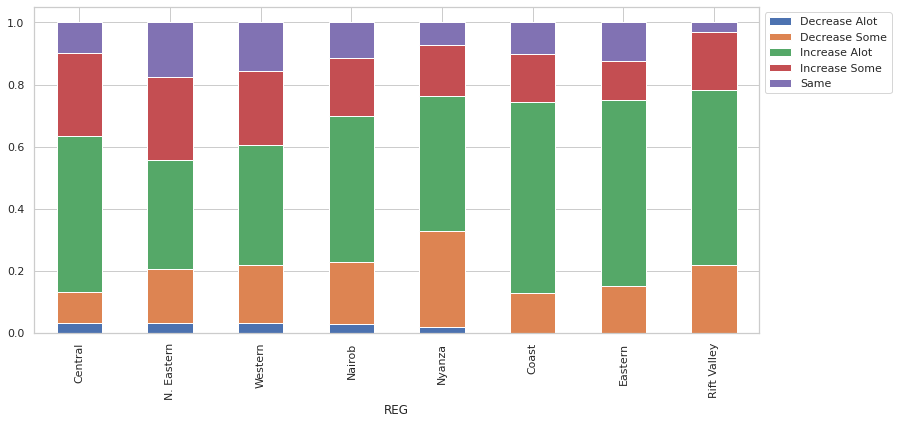

In [422]:
stacked_barplot(hr, "REG", "Corruptx")

REG            Central  Coast  Eastern  N. Eastern  Nairob  Nyanza  \
Corruptx                                                             
All                 30     39       40          63     253      55   
Increase Alot       15     24       24          22     119      24   
Increase Some        8      6        5          17      47       9   
Decrease Some        3      5        6          11      51      17   
Same                 3      4        5          11      29       4   
Decrease Alot        1      0        0           2       7       1   

REG            Rift Valley  Western  All  
Corruptx                                  
All                     32       96  608  
Increase Alot           18       37  283  
Increase Some            6       23  121  
Decrease Some            7       18  118  
Same                     1       15   72  
Decrease Alot            0        3   14  
-----------------------------------------------------------------------------------------------

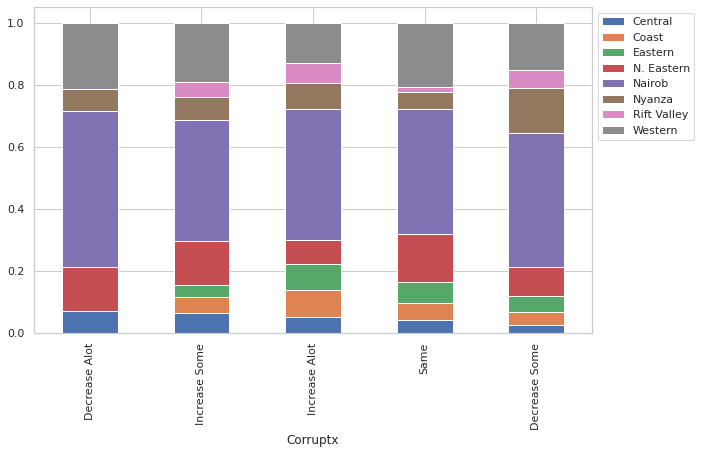

In [423]:
stacked_barplot(hr, "Corruptx", "REG")

Area1          rural  urban  All
Corruptx                        
All              189    419  608
Increase Alot     93    190  283
Decrease Some     37     81  118
Increase Some     37     84  121
Same              19     53   72
Decrease Alot      3     11   14
------------------------------------------------------------------------------------------------------------------------


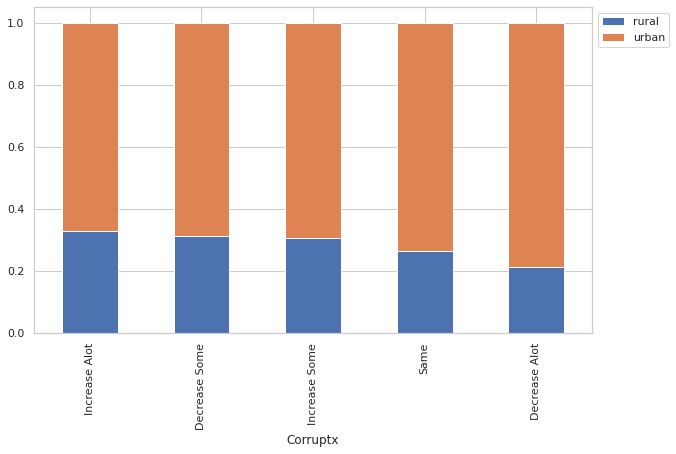

In [424]:
stacked_barplot(hr, "Corruptx", "Area1")

In [425]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 608 entries, 0 to 2318
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Corruptx  608 non-null    category
 1   REG       608 non-null    category
 2   Area1     608 non-null    category
dtypes: category(3)
memory usage: 7.2 KB


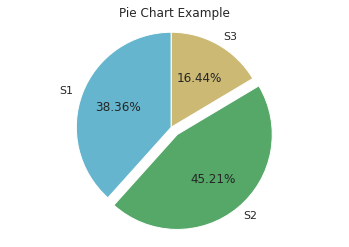

In [426]:
import matplotlib.pyplot as plt

labels = 'S1', 'S2', 'S3'
sections = [56, 66, 24]
colors = ['c', 'g', 'y']

plt.pie(sections, labels=labels, colors=colors,
        startangle=90,
        explode = (0, 0.1, 0),
        autopct = '%1.2f%%')

plt.axis('equal') # Try commenting this out.
plt.title('Pie Chart Example')
plt.show()

In [427]:
hr.shape

(608, 3)

In [428]:
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


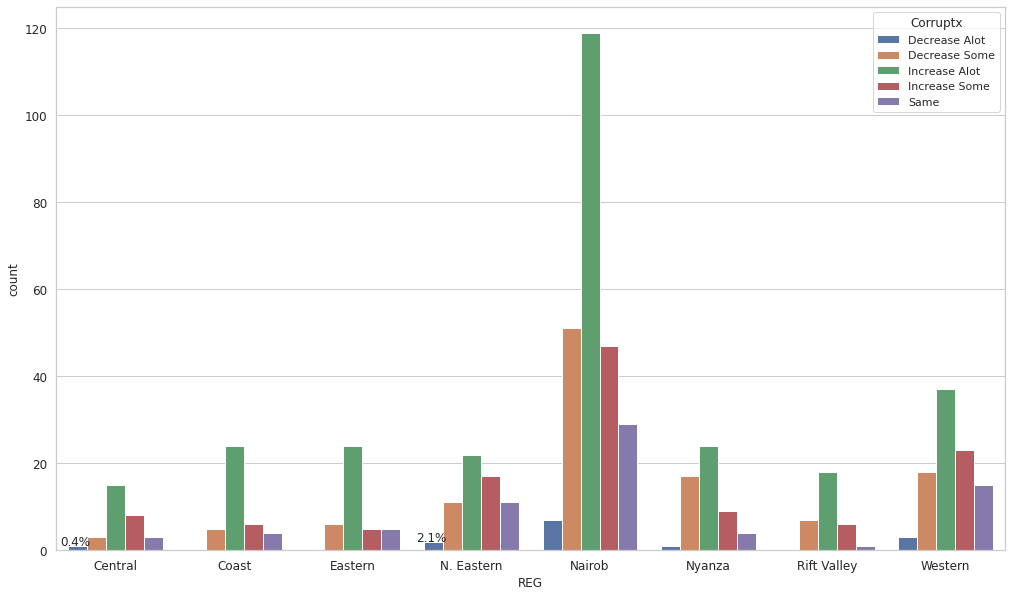

In [429]:
from numpy.ma.core import ptp
from numpy.core.fromnumeric import size
plt.figure(figsize=(17,10))
ax = sns.countplot('REG', hue='Corruptx', data = hr)
plt.xticks(size=12)
plt.xlabel('REG', size= 12)
plt.yticks(size = 12)
plt.ylabel('count', size =12)

with_hue(ax,hr.REG,2,2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


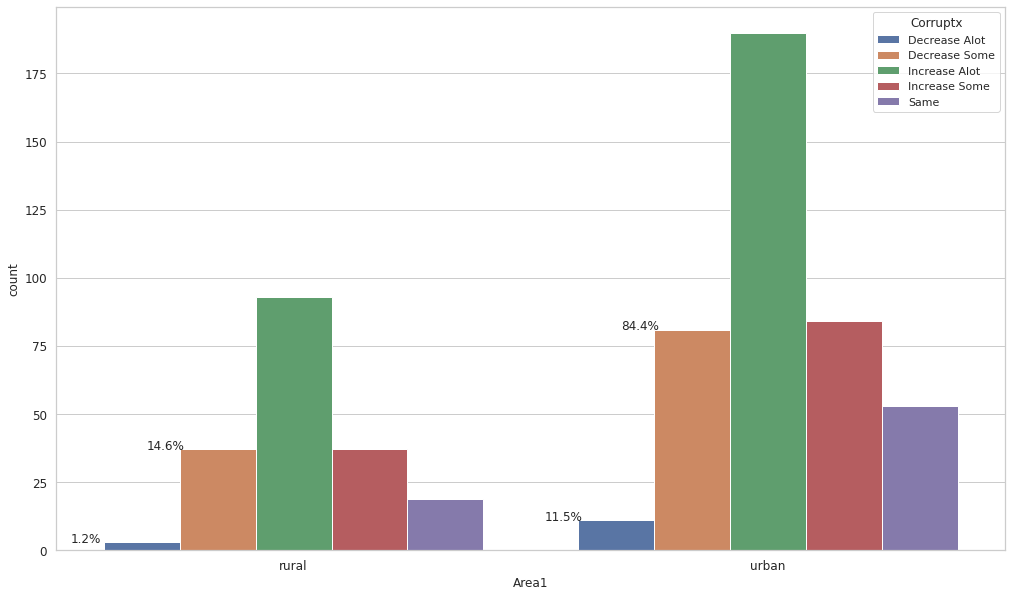

In [430]:
from numpy.ma.core import ptp
from numpy.core.fromnumeric import size
plt.figure(figsize=(17,10))
ax = sns.countplot('Area1', hue='Corruptx', data = hr)
plt.xticks(size=12)
plt.xlabel('Area1', size= 12)
plt.yticks(size = 12)
plt.ylabel('count', size =12)

with_hue(ax,hr.REG,2,2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


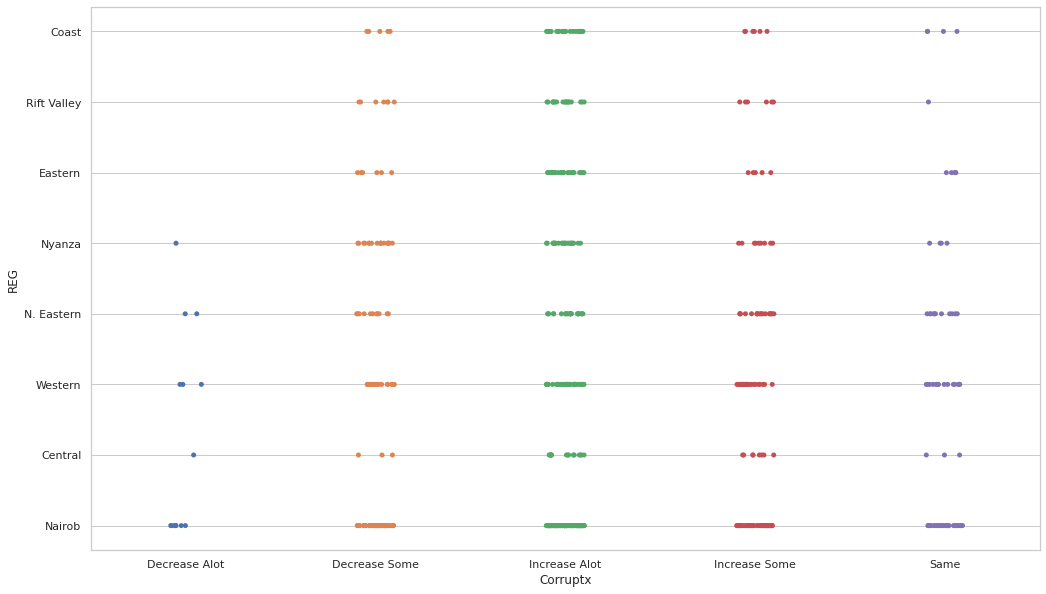

In [431]:
plt.figure(figsize=(17,10))
sns.stripplot(hr['Corruptx'], hr['REG'], jitter=True);

In [432]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 608 entries, 0 to 2318
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Corruptx  608 non-null    category
 1   REG       608 non-null    category
 2   Area1     608 non-null    category
dtypes: category(3)
memory usage: 23.4 KB


In [433]:
# function to create labeled barplots


def labeled_barplot(hotel, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(hotel[feature])  # length of the column
    count = hotel[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=hotel,
        x=feature,
        palette="Paired",
        order=hotel[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

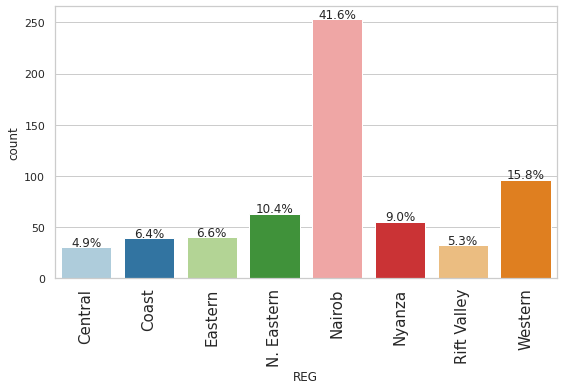

In [434]:
labeled_barplot(hr, "REG", perc=True)

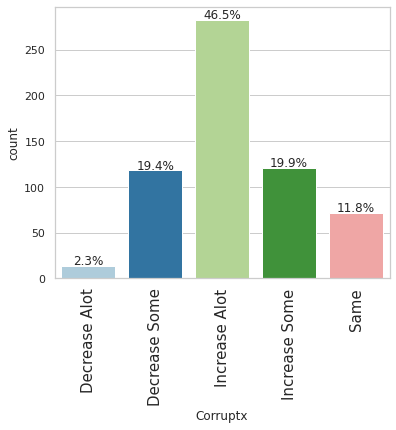

In [435]:
labeled_barplot(hr, "Corruptx", perc=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


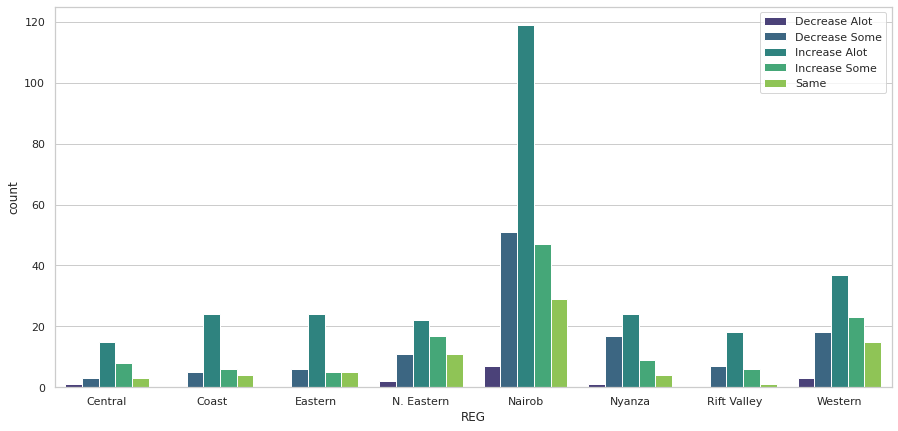

In [436]:
plt.figure(figsize=(15,7))
sns.countplot(hr["REG"],hue=hr["Corruptx"],palette='viridis')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

In [440]:
# Write Training Set
hr.to_csv('MMOSES_train.csv',index= True)

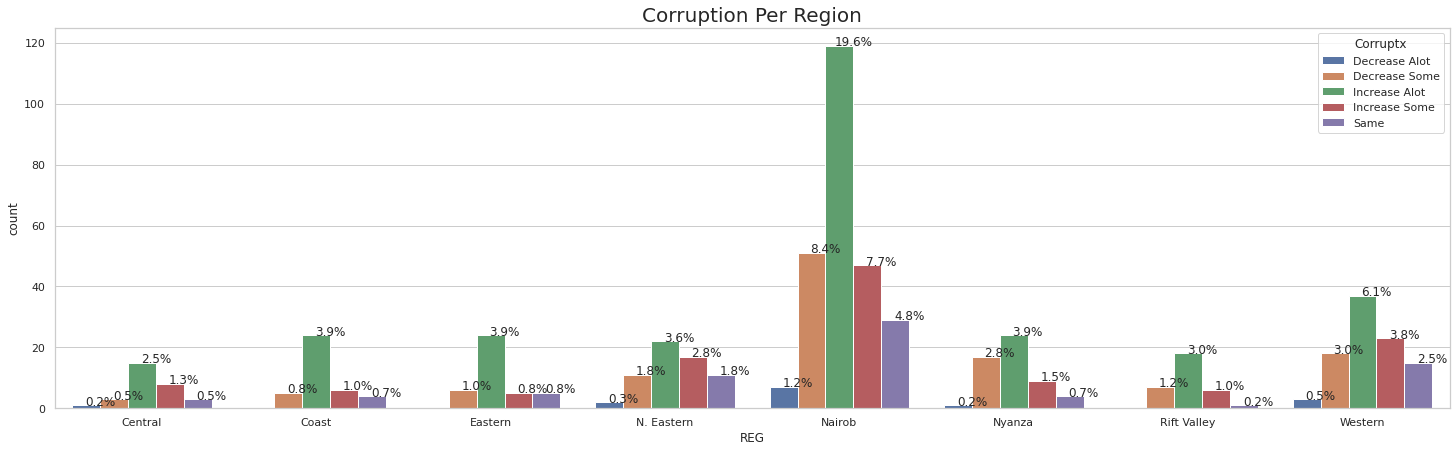

In [438]:
sns.set(style="whitegrid")
plt.figure(figsize=(25,7))
total = float(len(hr))
ax = sns.countplot(x="REG", hue="Corruptx", data=hr)
plt.title('Corruption Per Region', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

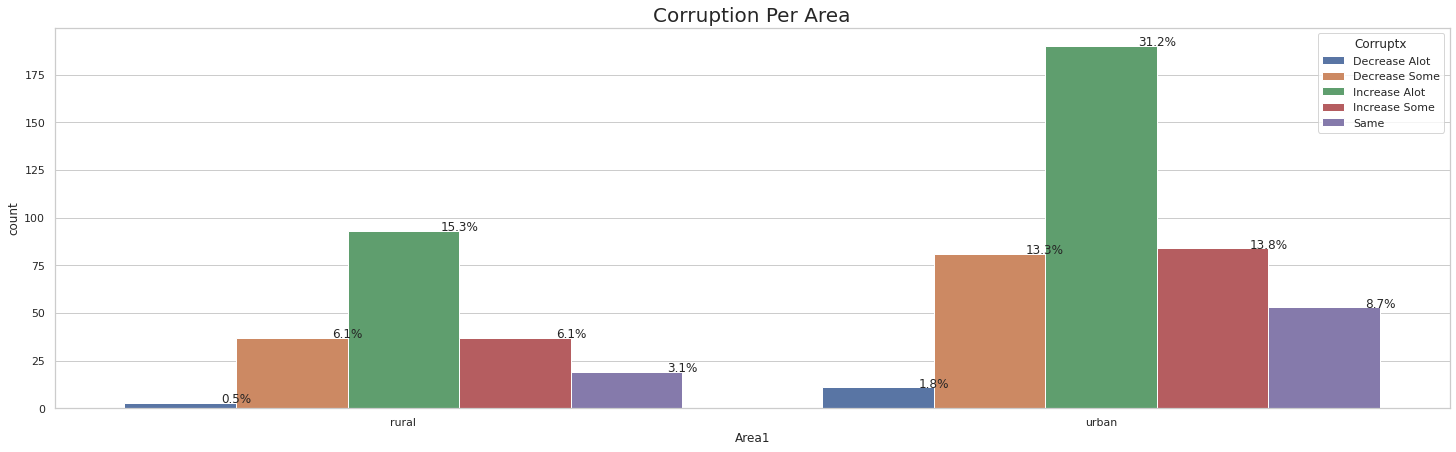

In [439]:
sns.set(style="whitegrid")
plt.figure(figsize=(25,7))
total = float(len(hr))
ax = sns.countplot(x="Area1", hue="Corruptx", data=hr)
plt.title('Corruption Per Area', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

In [443]:
# Write Training Set
hr.to_excel('MMOSES_train.xlsx',index= False, sheet_name='Corruption')

In [444]:
from google.colab import drive

drive.mount('/content/drive')
path = '/content/drive/My Drive/outpur.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  hr.to_csv(f)

Mounted at /content/drive
